# Lab: Sentiment classification 
First, we import some of libraries, including *vectorizers* and *classifiers*.

In [167]:
import csv
import pandas as pd
import sklearn.model_selection as skm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

## Loading data

We use a subset of the *Yelp reviews* dataset: each short text is accompanied with a sentiment label (0 -- negative, 1 -- positive). 

In [169]:
data = pd.read_csv('yelp_labelled.txt', header=None, sep='\t')
data.head(5)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data preparation
We split the data into train and test subsets and transform texts into vectors.

In [170]:
X_text = data[0]
y = data[1]
X_text_train, X_text_test, y_train, y_test = skm.train_test_split(X_text, y, test_size=0.2, stratify=y, random_state=0)
vectorizer = CountVectorizer(min_df=1, stop_words="english", binary=False, lowercase=True)
X_train = vectorizer.fit_transform(X_text_train)
X_test = vectorizer.transform(X_text_test)
print('Vocabulary size: ', X_train.shape[1])

Vocabulary size:  1568


## Training and testing

We fit a multinomial naive Bayes classifier and test it. 

In [171]:
clf = MultinomialNB(alpha=1.0)
clf.fit(X_train, y_train)
print('Test set accuracy: %.3f' % accuracy_score(y_test, clf.predict(X_test)))

Test set accuracy: 0.790


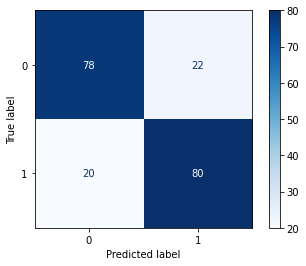

In [172]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )